<strong>Data Source:</strong> https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist

<strong>Importing Libraries</strong>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.8.0


<strong>Loading the data</strong>

In [2]:
fmnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

Description for each Label within the Dataset

Label | Description
--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandel
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle Boot

<strong>Visualising the loaded data</strong>

Image Shape: 9

Image Pixel Array: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

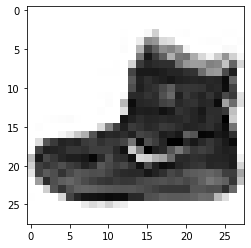

In [3]:
index = 0

np.set_printoptions(linewidth=320)

print(f'Image Shape: {train_labels[index]}')
print(f'\nImage Pixel Array: \n{train_images[index]}')

plt.imshow(train_images[index], cmap = 'Greys')

Image Shape: 3

Image Pixel Array: 
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 12

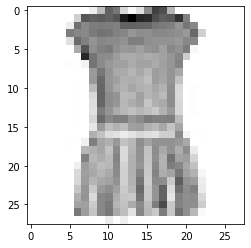

In [4]:
index = 3

np.set_printoptions(linewidth=320)

print(f'Image Shape: {train_labels[index]}')
print(f'\nImage Pixel Array: \n{train_images[index]}')

plt.imshow(train_images[index], cmap = 'Greys')

<strong>Normalising the pixel values of train and test images</strong>
<br>
Since pixel values are between 0 and 255, values for each pixel is devided by 255. 

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

<strong>Coding the Neural Network</strong>

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5024 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8908


In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8707


[0.35701271891593933, 0.8707000017166138]

In [9]:
classifications = model.predict(test_images)

<strong>Maing some predictions</strong>

Predicted Value: 6
Actual Value: 6


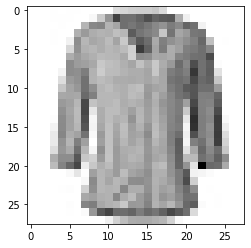

In [10]:
i = 4
print(f'Predicted Value: {np.argmax(classifications[i])}')
print(f'Actual Value: {test_labels[i]}')
plt.imshow(test_images[i], cmap = 'Greys')

Predicted Value: 2
Actual Value: 2


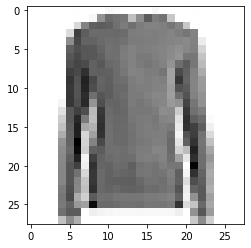

In [11]:
i = 321
print(f'Predicted Value: {np.argmax(classifications[i])}')
print(f'Actual Value: {test_labels[i]}')
plt.imshow(test_images[i], cmap = 'Greys')

Predicted Value: 1
Actual Value: 1


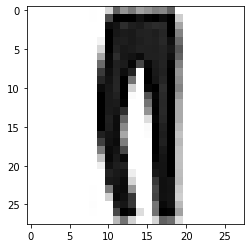

In [12]:
i = 2
print(f'Predicted Value: {np.argmax(classifications[i])}')
print(f'Actual Value: {test_labels[i]}')
plt.imshow(test_images[i], cmap = 'Greys')